In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
%matplotlib inline


def sum_of_square(vec_a, vec_b):
    diff = vec_a - vec_b
    diff_squared = np.square(diff)
    return (np.sum(diff_squared))

df = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\July2016_sorted_station_timeind.csv")

In [223]:
df['y_t_1'] = df.Temperature.shift(-1) # y_(t+1)
df['y_t_2'] = df.Temperature.shift(-2) # y_(t+2)
df['y_t_3'] = df.Temperature.shift(-3) # y_(t+3)
df['y_t_4'] = df.Temperature.shift(-4) # y_(t+4)
df['y_t_5'] = df.Temperature.shift(-5) # y_(t+5)

In [224]:
y_gt = df.as_matrix(columns=['Temperature'])

tot_points = y_gt.shape[0]
train_points = 700
test_points = tot_points - train_points
print(tot_points, train_points, test_points)

744 700 44


In [225]:
# df
# print(linear_model.LinearRegression.__doc__)
# df.keys()

In [226]:
# for (t+5) forecasts, which means forecasting for the next 5 hours
# df.WindDirectionCompass.unique()

# df.head(5)

In [227]:
# df.to_csv('July2016_pandas_df.csv')

In [228]:
print(y_gt.shape)

(744, 1)


In [229]:
# df.y_t_1.name

In [230]:
# x = df.as_matrix(columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])

# x_t1 = df.as_matrix(columns=['time_index', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'Pressure'])
# x_t1 = df.as_matrix(columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])
x_t1 = df.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])

# Do scaling according to min-max scaling
scaler_minmax = preprocessing.MinMaxScaler()
x_t1 = scaler_minmax.fit_transform(x_t1)

# Add polynomials
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_t1 = poly.fit_transform(x_t1)

# get the vectors for five-hour forecast
y_gt_t1 = df.as_matrix(columns=[df.y_t_1.name])
y_gt_t2 = df.as_matrix(columns=[df.y_t_2.name])
y_gt_t3 = df.as_matrix(columns=[df.y_t_3.name])
y_gt_t4 = df.as_matrix(columns=[df.y_t_4.name])
y_gt_t5 = df.as_matrix(columns=[df.y_t_5.name])

print(x_t1.shape)
print(y_gt_t1.shape)
print(y_gt_t2.shape)
print(y_gt_t3.shape)
print(y_gt_t4.shape)
print(y_gt_t5.shape)

(744, 46)
(744, 1)
(744, 1)
(744, 1)
(744, 1)
(744, 1)


In [231]:
# x_t1[743:744,:]
# y_gt_t1[0:744,:]
# print(y_gt_t1.shape[0],y_gt_t1.shape[1])
print(x_t1[1:2,:])

[[ 1.          0.60674157  0.6516129   0.40350877  0.26315789  0.31730769
   0.          0.69811321  0.          0.          0.39536064  0.24482555
   0.15966884  0.19252377  0.          0.42357431  0.          0.
   0.26293152  0.17147708  0.20676179  0.          0.45489957  0.          0.
   0.10618652  0.12803644  0.          0.2816948   0.          0.
   0.08350202  0.          0.183714    0.          0.          0.
   0.22151669  0.          0.          0.          0.          0.          0.
   0.          0.        ]]


In [232]:
# Generate Train Sequence
x_t1_train = x_t1[0:train_points + 1,:]
y_gt_t1_train = y_gt_t1[0:train_points + 1,:]
y_gt_t2_train = y_gt_t2[0:train_points + 1,:]
y_gt_t3_train = y_gt_t3[0:train_points + 1,:]
y_gt_t4_train = y_gt_t4[0:train_points + 1,:]
y_gt_t5_train = y_gt_t5[0:train_points + 1,:]




# Generate Test Sequence
x_t1_test = x_t1[train_points:tot_points + 1 ,:]
y_t1_test = y_gt_t1[train_points:tot_points + 1,:]
y_t2_test = y_gt_t2[train_points:tot_points + 1,:]
y_t3_test = y_gt_t3[train_points:tot_points + 1,:]
y_t4_test = y_gt_t4[train_points:tot_points + 1,:]
y_t5_test = y_gt_t5[train_points:tot_points + 1,:]


print(x_t1_train.shape, y_gt_t1_train.shape, y_gt_t2_train.shape, y_gt_t3_train.shape, y_gt_t4_train.shape, y_gt_t5_train.shape)
print(x_t1_test.shape, y_t1_test.shape, y_t2_test.shape, y_t3_test.shape, y_t4_test.shape, y_t5_test.shape)

(701, 46) (701, 1) (701, 1) (701, 1) (701, 1) (701, 1)
(44, 46) (44, 1) (44, 1) (44, 1) (44, 1) (44, 1)


In [254]:
# print(y_gt_t4_train[0:5,:])
# print(x_t1_test[0])
# print(y_t5_test)

In [234]:
# call linear regression for five forecasts
obj_1 = linear_model.LinearRegression()
obj_1.fit(x_t1_train,y_gt_t1_train)

obj_2 = linear_model.LinearRegression()
obj_2.fit(x_t1_train,y_gt_t2_train)

obj_3 = linear_model.LinearRegression()
obj_3.fit(x_t1_train,y_gt_t3_train)

obj_4 = linear_model.LinearRegression()
obj_4.fit(x_t1_train,y_gt_t4_train)

obj_5 = linear_model.LinearRegression()
obj_5.fit(x_t1_train,y_gt_t5_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [268]:
# regression_object.predict(x)[0:5] predict first five data vectors
test_ind = 10;
ybar_1 = obj_1.predict(x_t1_test)[test_ind]
ybar_2 = obj_2.predict(x_t1_test)[test_ind]
ybar_3 = obj_3.predict(x_t1_test)[test_ind]
ybar_4 = obj_4.predict(x_t1_test)[test_ind]
ybar_5 = obj_5.predict(x_t1_test)[test_ind]
print(ybar_1, ybar_2, ybar_3, ybar_4, ybar_5)

# get groundtruth vector
y_gt_vec = np.empty(5)
y_gt_vec[0] = y_t1_test[test_ind]
y_gt_vec[1] = y_t2_test[test_ind]
y_gt_vec[2] = y_t3_test[test_ind]
y_gt_vec[3] = y_t4_test[test_ind]
y_gt_vec[4] = y_t5_test[test_ind]
print(y_gt_vec)

# get prediction vector
y_pred_vec = np.empty(5)
y_pred_vec[0] = ybar_1
y_pred_vec[1] = ybar_2
y_pred_vec[2] = ybar_3
y_pred_vec[3] = ybar_4
y_pred_vec[4] = ybar_5

print(y_pred_vec)

# print('from function = \n' sum_of_square(y_pred_vec, y_gt_vec))
sse = sum_of_square(y_pred_vec, y_gt_vec)
print('from function, sse = %f\n' %(sse) )

[ 11.31993734] [ 11.3121882] [ 11.33156983] [ 11.36356639] [ 11.33967271]
[ 11.9  10.8  10.5  11.4  10. ]
[ 11.31993734  11.3121882   11.33156983  11.36356639  11.33967271]
from function, sse = 3.086368



In [236]:
# function for total sse


[ 10.3  10.1   9.    9.1   8.7]
[ 9.92295544  9.58266314  9.17223622  8.8110058   8.59119297]


from function, sse = 0.534822



In [238]:
# all_data = np.append(x_reshaped,col,1)
# diff_vec = y_gt_vec - y_pred_vec
# val_squared = np.square(diff_vec)
# sse = np.sum(val_squared)
# print(diff_vec)
# print(val_squared)
# print('Sum of squared deviations = %f\n' % (sse))


[ 0.37704456  0.51733686 -0.17223622  0.2889942   0.10880703]
[ 0.1421626   0.26763743  0.02966532  0.08351765  0.01183897]
Sum of squared deviations = 0.534822



In [239]:
# all_data.shape


In [240]:
# regression_object.fit(all_data,y)

In [241]:
# all_data
# find Nan in array
# nan_indices = np.argwhere(np.isnan(y_t1_test))
# nan_indices

In [242]:
# y_play = y_t1_test
# y_play

In [243]:
# print(regression_object.intercept_)
# print(regression_object.coef_)

In [244]:
# regression_object.predict(x)[0:5] predict first five data vectors
# pred_y = regression_object.predict(x_t1_test)[0:5]

In [245]:
# print(pred_y.shape)

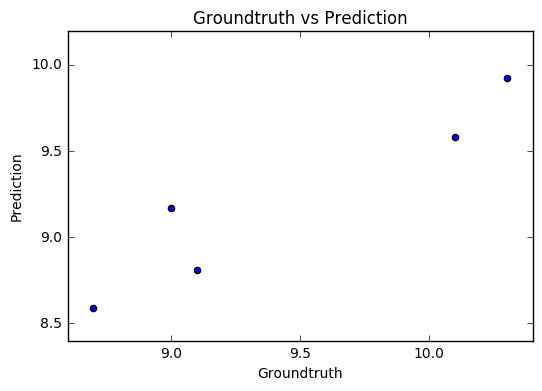

In [246]:
plt.scatter(y_gt_vec,y_pred_vec)
plt.xlabel('Groundtruth')
plt.ylabel('Prediction')
plt.title('Groundtruth vs Prediction')

In [247]:
# print(regression_object.predict(x)[105:109])
# print(regression_object.coef_)
# print(x[0:1,:].shape)

In [248]:
# use y_predict = coeffs*X + intercept for prediction and see if you have gotten their format

# obs = 105; # 1st observation
# data_vector = x[obs:obs+1,:] # Rank-2 view of data_vector
# intercept = regression_object.intercept_
# coeffs = regression_object.coef_
# print(data_vector.shape, coeffs.shape)
# print(data_vector, coeffs)
# print(np.dot(data_vector[0],coeffs[0]))

# Handling numpy arrays
# coeffs_1Darray = coeffs[0]
# data_vector_1Darray = data_vector[0]

# y_predict = (np.dot(coeffs_1Darray,data_vector_1Darray)) + intercept
# print('prediction = %f\n' %y_predict)

In [249]:
# Printing the first column of data matrix, which is time
# x[:,0:1]
# pred_y 

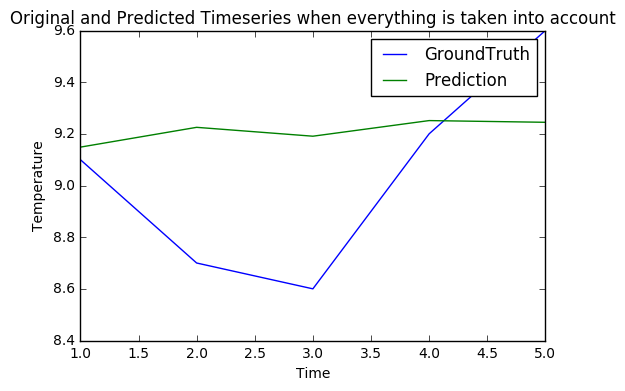

In [260]:
# time_index = x_t1_test[test_ind:test_ind + 5, 0:1];
time_index = np.arange(1,6,1)
# print(time_ind)
plt.plot(time_index,y_gt_vec,label="GroundTruth",color='b')
plt.plot(time_index,y_pred_vec,label="Prediction",color='g')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.title('Original and Predicted Timeseries when everything is taken into account')

In [251]:
print(time_index)
print(y_gt_vec)
print(y_pred_vec)

[1 2 3 4 5]
[ 10.3  10.1   9.    9.1   8.7]
[ 9.92295544  9.58266314  9.17223622  8.8110058   8.59119297]


In [252]:
# scatter plots of data 
# str_text='RainfallLast10Minutes'
# plt.scatter(y_gt_t1_train,df.as_matrix(columns=[str_text]),color='r')
# plt.xlabel('Temperature')
# plt.ylabel(str_text)

In [253]:
# df.as_matrix(columns=['Temperature'])